# Pizza Price Data

- About the DataSet
- created 4 pizza prices list data from various companies, 
 **Pizza Hut - Domino's Pizza - IMO's Pizza - Godfather's Pizza**

### Content
- Company : The company that made the pizza.
- Pizza Name : The name of the pizza.
- Type : The type of pizza.
- Size : The size of the pizza.
- Price : The price of the pizza.

## Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import os
import plotly.graph_objects as go
import plotly.express as px

plt.style.use("ggplot") # for using style graph ggplot

In [2]:
#Importing the dataset

df=pd.read_csv("../input/pizza-price-prediction-real-data/pizza_data.csv")

In [3]:
# looking the data set
df.head()

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99


In [4]:
# print the shape dataset
print("Shape The DataSet ", df.shape )

Shape The DataSet  (371, 5)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     371 non-null    object
 1   Pizza Name  371 non-null    object
 2   Type        371 non-null    object
 3   Size        371 non-null    object
 4   Price       371 non-null    object
dtypes: object(5)
memory usage: 14.6+ KB


In [6]:
# The column Price Dtype - object and have symbol $ 
# Now change the Data type also drop symbol $


df["Price"] = df["Price"].str.replace("$", "").astype("float64")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


In [7]:
#checking null value 
df.isna().sum()

Company       0
Pizza Name    0
Type          0
Size          0
Price         0
dtype: int64

In [8]:
# No any missing value 

In [9]:
# Describe the price

df.describe()

,Price
count,371.000000
mean,16.319326
std,5.714662
min,4.290000
25%,12.490000
50%,15.490000
75%,19.950000
max,29.990000


###  Visualisation - how repeat at the data 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Company', ylabel='count'>

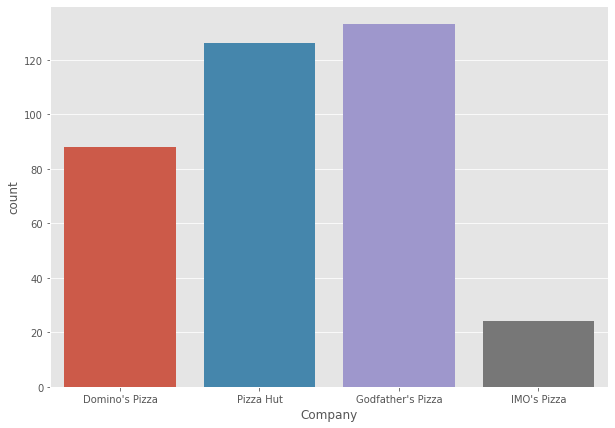

In [10]:
# how much repeat the company ?
plt.figure(figsize=(10,7))
sns.countplot(df["Company"])



In [11]:
# Godfather's Pizza    36 %
# Pizza Hut            34 %
# Domino's Pizza       23 %
# IMO's Pizza          7  %

In [12]:
# how much repeat the Pizza Name ?
# we have a lot of Name = around 247 , we see high 5 name
df["Pizza Name"].value_counts().unique

<bound method Series.unique of Egg-Ceptional Pizza                                            4
BBQ Chicken Pizza                                              4
All Meat Pizza                                                 4
Cheese Pizza                                                   4
Veggie Pizza                                                   4
                                                              ..
Ultimate Cheese Lover's Pizza (Stuffed Crust)                  1
Ultimate Cheese Lover's Pizza (Skinny Slice)                   1
Honolulu Hawaiian (Hand Tossed, Handmade Pan or Thin Crust)    1
Veggie Lover's® Pizza (Stuffed Crust)                          1
New Primo Meat Pizza (Stuffed Crust)                           1
Name: Pizza Name, Length: 247, dtype: int64>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Type', ylabel='count'>

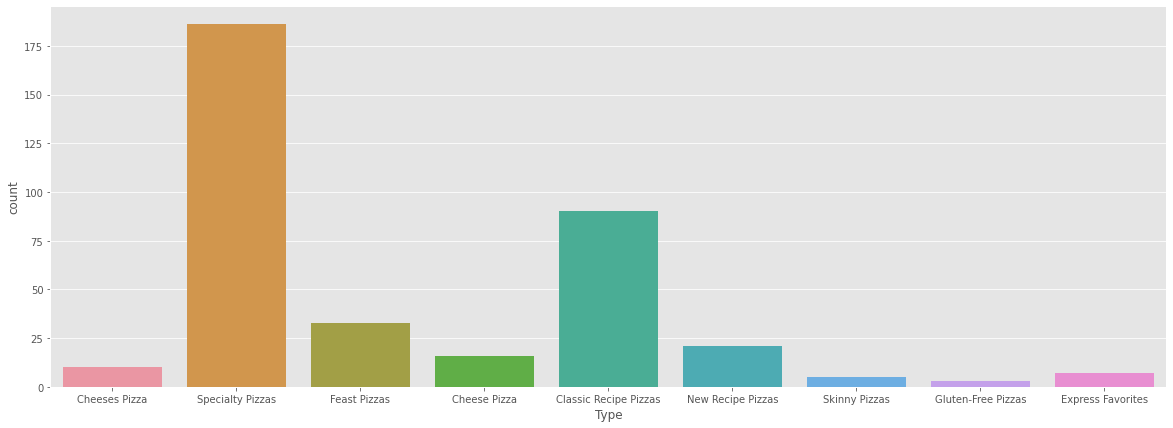

In [13]:
# About the Type of Pizza - # how much repeat the Pizza Type ?

plt.figure(figsize=(20,7))
sns.countplot(df["Type"])



In [14]:
# Specialty Pizzas         50 %
# Classic Recipe Pizzas    24 %
# Feast Pizzas              9 %
# New Recipe Pizzas         6 %
# Cheese Pizza              4 %
# Cheeses Pizza             3 %
# Express Favorites         2 %
# Skinny Pizzas             1 %
# Gluten-Free Pizzas        1 %

# I thank  Specialty Pizzas it`s famous 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Size', ylabel='count'>

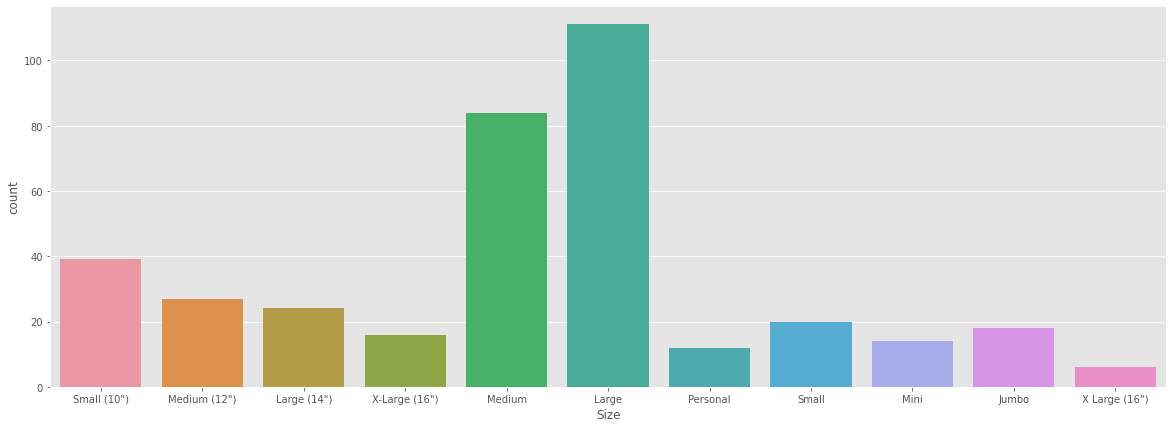

In [15]:
# how much repeat the Pizza Size ?


plt.figure(figsize=(20,7))
sns.countplot(df["Size"])

## Analysis using pivot_table , group_by

In [16]:
# group the to show how the average price for the company

avg=df.groupby("Company")["Price"].agg(["max","min","mean"])
avg

,max,min,mean
Company,,,
Domino's Pizza,17.99,5.99,14.291136
Godfather's Pizza,29.99,4.99,20.271128
IMO's Pizza,23.85,9.30,17.102083
Pizza Hut,18.49,4.29,13.415397


<AxesSubplot:xlabel='Company'>

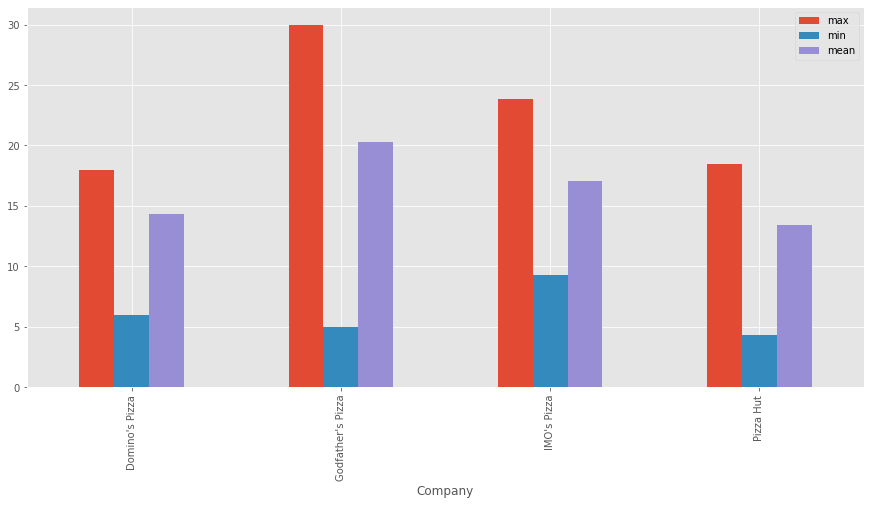

In [17]:
# Visualisation group by

avg.plot(kind='bar',figsize=(15,7))

In [18]:
# group the to show how the average price for the Type

T_avg=df.groupby("Type")["Price"].agg(["max","min","mean"])
T_avg

,max,min,mean
Type,,,
Cheese Pizza,18.99,4.29,11.133750
Cheeses Pizza,11.99,5.99,8.690000
Classic Recipe Pizzas,18.49,4.79,13.712222
Express Favorites,21.99,4.99,15.382857
Feast Pizzas,17.99,11.99,15.035455
Gluten-Free Pizzas,23.99,9.99,17.990000
New Recipe Pizzas,15.49,4.79,13.551905
Skinny Pizzas,15.49,15.49,15.490000
Specialty Pizzas,29.99,5.99,19.007903


<AxesSubplot:xlabel='Type'>

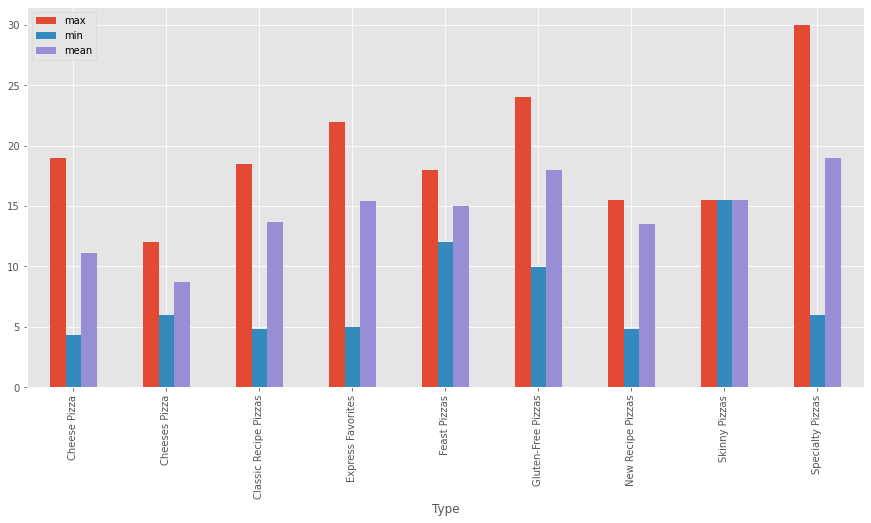

In [19]:
T_avg.plot(kind='bar',figsize=(15,7))

<AxesSubplot:xlabel='Company'>

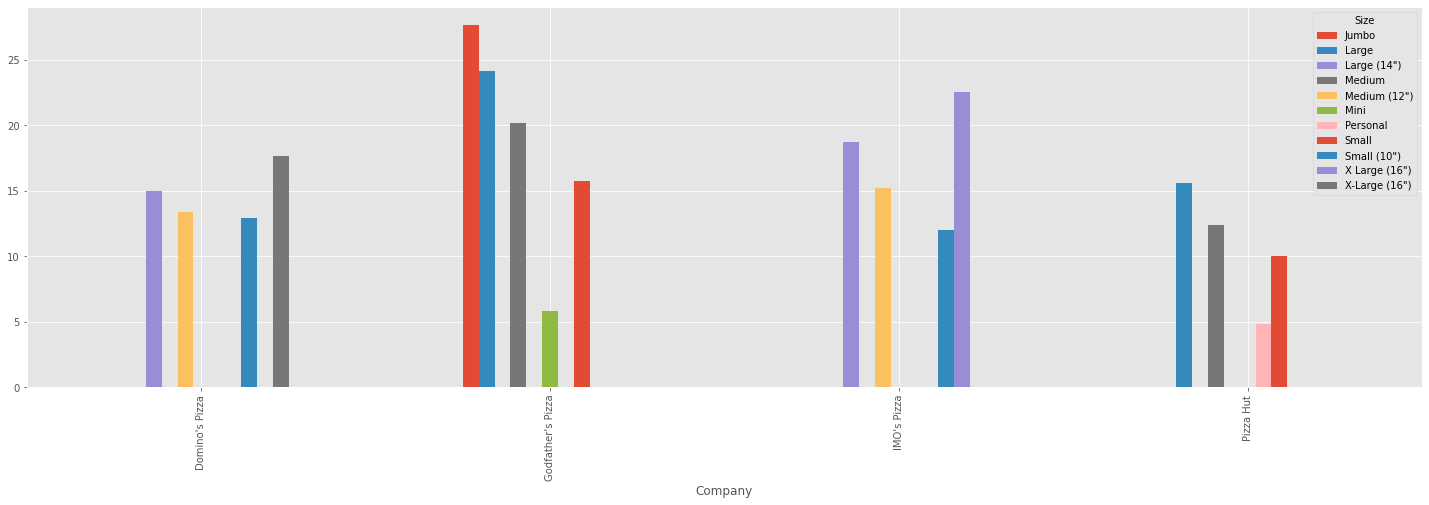

In [20]:
# make pivot table how the average price for the size and company


df.pivot_table(values="Price",index="Company",columns="Size").plot(kind="bar",figsize=(25,7))

In [21]:
# We see all the company have 4 size pizza Except the company Godfather's Pizza have 5 size 

## Filter Company

In [22]:
# Now make Filter each company for see what the type , size , price 
# filter company Godfather's Pizza

df_GP=df[(df["Company"]=="Godfather's Pizza")]
df_GP.sort_values(by="Price",ascending=False)

,Company,Pizza Name,Type,Size,Price
295,Godfather's Pizza,Super Combo Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
313,Godfather's Pizza,The Don (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
307,Godfather's Pizza,Super Taco Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
301,Godfather's Pizza,Super Hawaiian Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,29.99
319,Godfather's Pizza,Super Veggie Pizza (Original or Thin Crust),Specialty Pizzas,Jumbo,28.99
...,...,...,...,...,...
269,Godfather's Pizza,Hawaiian Pizza (Original Crust),Specialty Pizzas,Mini,5.99
276,Godfather's Pizza,BLT Pizza (Original Crust),Specialty Pizzas,Mini,5.99
283,Godfather's Pizza,Buffalo Chicken Pizza (Original Crust),Specialty Pizzas,Mini,5.99
340,Godfather's Pizza,Original Crust,Express Favorites,Mini,4.99


In [23]:
# filter company Domino's Pizza 's Pizza

df_DP=df[(df["Company"]=="Domino's Pizza")]
df_DP.sort_values(by="Price",ascending=False)

,Company,Pizza Name,Type,Size,Price
43,Domino's Pizza,Fiery Hawaiian™ (Brooklyn Style),Specialty Pizzas,"X-Large (16"")",17.99
33,Domino's Pizza,Pacific Veggie (Brooklyn Style),Specialty Pizzas,"X-Large (16"")",17.99
59,Domino's Pizza,America's Favorite Feast® (Brooklyn Style),Feast Pizzas,"X-Large (16"")",17.99
65,Domino's Pizza,Bacon Cheeseburger Feast® (Brooklyn Style),Feast Pizzas,"X-Large (16"")",17.99
18,Domino's Pizza,Wisconsin 6 Cheese (Brooklyn Style),Specialty Pizzas,"X-Large (16"")",17.99
...,...,...,...,...,...
5,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Medium (12"")",7.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",7.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",5.99


In [24]:
# filter company IMO's Pizza

df_IP=df[(df["Company"]=="IMO's Pizza")]
df_IP.sort_values(by="Price",ascending=False)

,Company,Pizza Name,Type,Size,Price
366,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"X Large (16"")",23.85
350,IMO's Pizza,Deluxe Pizza,Specialty Pizzas,"X Large (16"")",23.85
362,IMO's Pizza,All Meat Pizza,Specialty Pizzas,"X Large (16"")",23.85
354,IMO's Pizza,Veggie Pizza,Specialty Pizzas,"X Large (16"")",23.85
370,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"X Large (16"")",22.30
349,IMO's Pizza,Deluxe Pizza,Specialty Pizzas,"Large (14"")",19.95
361,IMO's Pizza,All Meat Pizza,Specialty Pizzas,"Large (14"")",19.95
353,IMO's Pizza,Veggie Pizza,Specialty Pizzas,"Large (14"")",19.95
365,IMO's Pizza,BBQ Chicken Pizza,Specialty Pizzas,"Large (14"")",19.20
369,IMO's Pizza,Egg-Ceptional Pizza,Specialty Pizzas,"Large (14"")",18.65


In [25]:
# filter company Pizza Hut

df_HP=df[(df["Company"]=="Pizza Hut")]
df_HP.sort_values(by="Price",ascending=False)

,Company,Pizza Name,Type,Size,Price
158,Pizza Hut,Chicken Supreme Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,18.49
185,Pizza Hut,Super Supreme Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,18.49
149,Pizza Hut,BBQ Lover's™ (Stuffed Crust),Classic Recipe Pizzas,Large,17.49
113,Pizza Hut,Meat Lover's® Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,17.49
131,Pizza Hut,Veggie Lover's® Pizza (Stuffed Crust),Classic Recipe Pizzas,Large,17.49
...,...,...,...,...,...
126,Pizza Hut,Veggie Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79
117,Pizza Hut,Ultimate Cheese Lover's Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79
108,Pizza Hut,Meat Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79
99,Pizza Hut,Pepperoni Lover's® Pizza (Pan Pizza),Classic Recipe Pizzas,Personal,4.79


## Visualisations Data / interactive

In [26]:
# using plotly , making scatter plot interactive [ Type pizza and price with the company ]

px.scatter(df, x="Type", y="Price",color="Company", title=" Type Pizza vs Price ")

In [27]:
# what you see in this graph , some of type pizza unique for one company.

In [28]:
# pie chart interactive - just press in company you will see the details


px.sunburst(df,values="Price",path=["Company","Type"],hover_name="Size",height=700)


<AxesSubplot:xlabel='Size', ylabel='Price'>

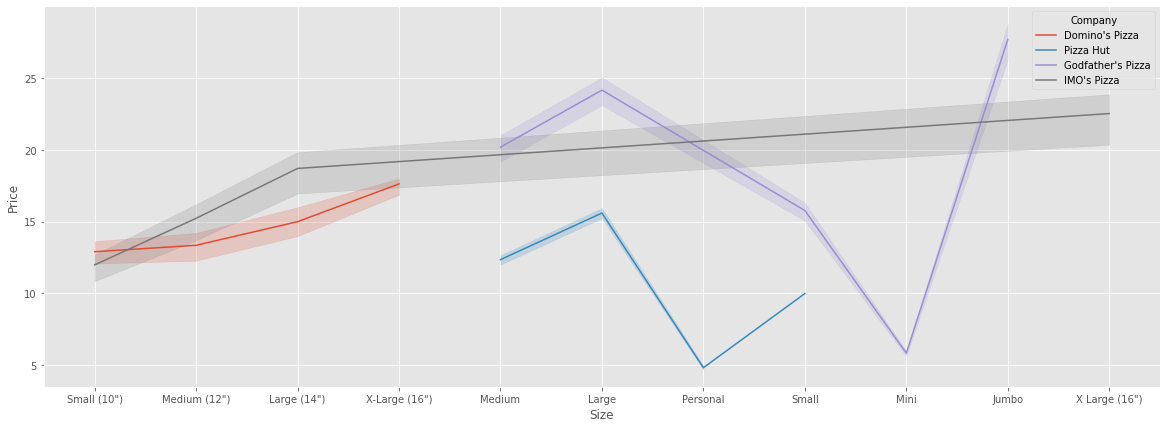

In [29]:
# using seaborn line plot about the size with price

plt.figure(figsize=(20,7))
sns.lineplot(data=df,x="Size",y="Price",hue="Company")

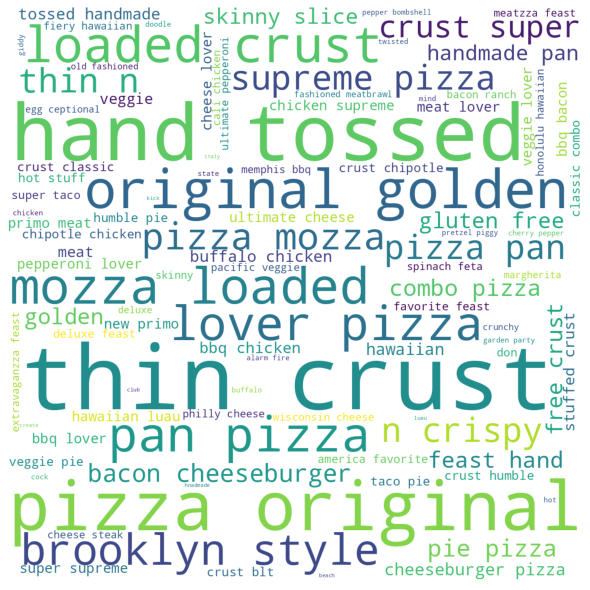

In [30]:
# we have a lot of type , then I will show how most repeated name 

df1=df.rename(columns={"Pizza Name":"Pizza_Name"}) #change the name column

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df1.Pizza_Name:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1200, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Abstract

### Some analysis and more frequent type ,  size and company showed.

#### Names of companies most frequently mentioned in the data and average price

 **Company**  -------------   **Repeat**  -------------  **Average price **

- Godfather's Pizza  ---------  36 % -------------20.271128
- Pizza Hut ------------------- 34 % ------------ 13.415397
- Domino's Pizza----------------23 %--------------14.291136
- IMO's Pizza-------------------7  %--------------17.102083



### Names of types most frequently mentioned in the data and average price

* **Type**                    **Repeat**      **Average price** 

- Specialty Pizzas------------50 % ---------------19.007903
- Classic Recipe Pizzas-------24 %----------------13.712222
- Feast Pizzas----------------9 %-----------------15.035455
- New Recipe Pizzas-----------6 %-----------------13.551905
- Cheese Pizza----------------4 %-----------------11.133750
- Cheeses Pizza---------------3 %------------------8.690000
- Express Favorites-----------2 %-----------------15.382857
- Skinny Pizzas---------------1 %-----------------15.490000
- Gluten-Free Pizzas----------- 1 % --------------17.990000


 ## All the company have 4 size pizza Except the company *Godfather's Pizza have 5 size 

- Godfather's Pizza   high price 
- Pizza Hut           less price 


## ----------------------- The End ----------

## Thank for reading my analysis , if you any questions or advice me please write in the comment ,
## also if you liked my analysis vote me ,